In [ ]:
import pandas as pd
df=pd.read_csv(r"/content/news-data.csv",nrows=2500)
df.head(2)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation


In [ ]:
df.isna().sum()

,0
publish_date,0
headline_text,0


In [ ]:
import seaborn as sns
sns.countplot(df["headline_text"])

In [ ]:
news=df.headline_text

In [ ]:
newses=news.str.replace("[^a-z0-9A-Z]"," ",regex=True)
newses

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
2495,suspected al qaeda mastermind arrested in paki...
2496,sydney man swims for a good cause
2497,taipans go out on a high
2498,taiwan tourist train crashes


In [ ]:
import nltk
nltk.download('punkt_tab')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn=WordNetLemmatizer()

from nltk.tokenize import word_tokenize

newses=newses.apply(lambda x:" ".join( [wn.lemmatize(i.lower())for i in word_tokenize(x)]))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words("english")
sw

newses=newses.apply(lambda x:" ".join([i for i in x.split() if i not in sw]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(newses)
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12950 stored elements and shape (2500, 4191)>
  Coords	Values
  (0, 74)	0.4690097563943947
  (0, 1052)	0.4690097563943947
  (0, 836)	0.37617808135439806
  (0, 548)	0.4690097563943947
  (0, 2186)	0.4456227062539964
  (1, 106)	0.36916092987554616
  (1, 1489)	0.29895784729162606
  (1, 4131)	0.43546872812396226
  (1, 2463)	0.4071012083487811
  (1, 345)	0.4663000985265822
  (1, 1058)	0.4489367711575202
  (2, 615)	0.37417946811083647
  (2, 1939)	0.5683065551353941
  (2, 2907)	0.5471448766498441
  (2, 3636)	0.48749345533069427
  (3, 163)	0.371230296414939
  (3, 2560)	0.3982035868499155
  (3, 3545)	0.4041092207553574
  (3, 326)	0.36116025665330354
  (3, 3595)	0.38785253863602276
  (3, 2705)	0.36768863205707614
  (3, 3174)	0.3525002911881697
  (4, 163)	0.36219705924527745
  (4, 2560)	0.38851400203810743
  (4, 3595)	0.3784148284001146
  :	:
  (2494, 879)	0.3949032519134449
  (2494, 2345)	0.49881612698772504
  (2495, 275)	0.41522429145

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,init="k-means++",random_state=1)
km.fit(x)

KMeans(n_clusters=5, random_state=1)

In [ ]:
y_pred=km.predict(x)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y_pred)

np.float64(0.0019486747547312372)

In [ ]:
# df["category"] = km.labels_
# df.head()

In [ ]:
# terms = tfidf.get_feature_names_out()

# for i in range(5):
#     print(f"\nCategory {i}:")
#     center = km.cluster_centers_[i]
#     top_words = center.argsort()[-10:]
#     print([terms[j] for j in top_words])



In [ ]:
# category_map = {
#     0: "Politics",
#     1: "Sports",
#     2: "Business",
#     3: "Technology",
#     4: "Entertainment"
# }

# df["category_name"] = df["category"].map(category_map)
# df.head()


In [ ]:
# new_news = [
#     "new minster"]

# new_vec = tfidf.transform(new_news)
# pred = km.predict(new_vec)

# print("Category:", category_map[pred[0]])


Category: Technology


In [ ]:
# 1. Assign cluster labels to the original dataframe
df["cluster"] = km.labels_

# 2. Identify the top keywords per cluster to determine "Topics"
import numpy as np

terms = tfidf.get_feature_names_out()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

print("Top terms per cluster:")
for i in range(5):
    top_10_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_10_words)}")

# 3. Create a Mapping (Adjust these names based on the printout above!)
# Example mapping based on common news datasets:
category_map = {
    0: "Local News",
    1: "International",
    2: "National Affairs",
    3: "Social Issues",
    4: "Miscellaneous"
}

df["category_name"] = df["cluster"].map(category_map)

Top terms per cluster:
Cluster 0: funding, canberra, road, call, crookwell, cairn, improve, nsw, rebuilds, win
Cluster 1: cup, world, america, race, fourth, postponed, semi, threat, racing, fa
Cluster 2: claim, high, indigenous, education, reject, new, price, hit, dollar, govt
Cluster 3: police, man, rain, council, water, govt, fire, plan, new, court
Cluster 4: iraq, un, missile, war, destroy, resolution, say, banned, new, wheat


/tmp/ipython-input-1914295188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category_name', palette='viridis')


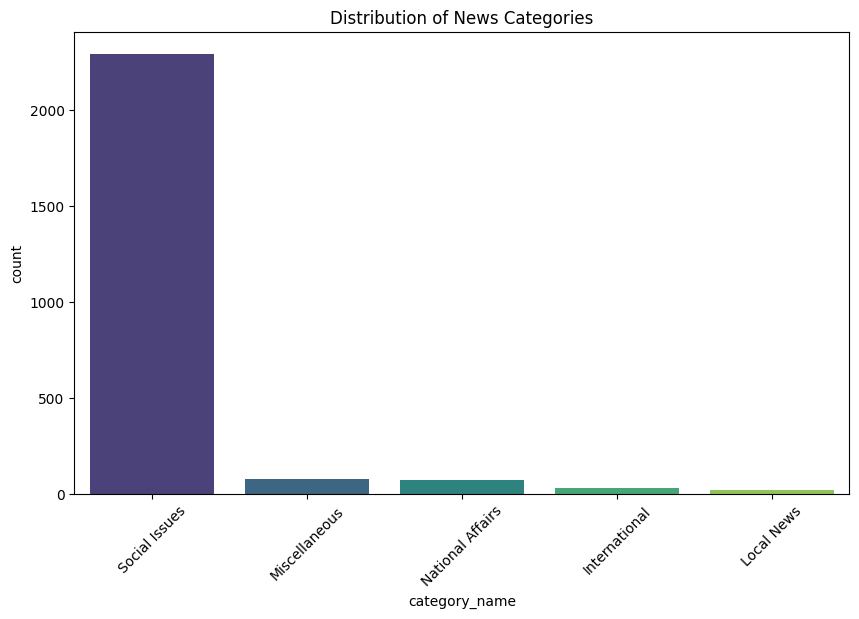

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category_name', palette='viridis')
plt.title("Distribution of News Categories")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def predict_category(text):
    # 1. Preprocess (Must match your training steps exactly)
    text = text.lower()
    tokens = word_tokenize(text)
    lemmatized = [wn.lemmatize(word) for word in tokens if word not in sw]
    clean_text = " ".join(lemmatized)

    # 2. Transform and Predict
    vec = tfidf.transform([clean_text])
    cluster_id = km.predict(vec)[0]

    return category_map[cluster_id]

# Test it out
test_headline = "New economic policy announced by the government"
print(f"Headline: {test_headline} \nPredicted Category: {predict_category(test_headline)}")

Headline: New economic policy announced by the government 
Predicted Category: Social Issues
